In [3]:
# Import packages as needed. Maybe PIL?
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import YAArrow

import numpy as np

from astropy.io import ascii

In [4]:
# Just a litte function so we can graph the planets with proper relative sizes
# Output min and max are 5 and 40 respectively
def planetScaling(radius):
    return 35*(radius - 1150)/(68850) + 5

In [72]:
def angularSizeChart():

    # read in data from spread sheet
    filename = "./datatable.csv"
    datalist = ascii.read(filename, format='csv')
    
    categories = np.unique(datalist['Category']) # may not need this in the end
    
    # set up figure (hard coding more things that usual since the goal is "pretty" not reproducable)
    f, ax = plt.subplots(1,figsize=(16,10))
    f.set_facecolor('w')
    f.canvas.set_window_title("Angular Sizes")
    
    axisFont = {'fontname':'Georgia', 'size':'16'}
    titleFont = {'fontname':'Georgia', 'size':'24', 'weight':'bold'}
    annoteFont = {'fontname':'Georgia', 'size':'12'}
    
    ax.set_title("Angular Sizes",y=1.2,**titleFont)
    
    ax.set_xscale("log")
    ax.set_xlabel("Angular Size (arcsec)",**axisFont)
    ax.invert_xaxis()
    ax.set_xlim(10**4,10**-4)
    ax.set_xticklabels(ax.get_xticks(), **axisFont)
    
    ax.yaxis.grid(True)
    ax.set_ylim(0, 8)
    ax.set_yticks(list(range(8))) 
    ax.set_yticklabels(['','The Moon/Sun','The Planets','Spacecraft','Stars',
                        'Quasars','Galaxies', 'Telescopes (seeing)'],**axisFont)
    
    # putting in references (on second axis for proper labeling)
    references = datalist[np.where(datalist['Category'] == 'Reference')]
    ax2 = ax.twiny()
    ax2.set_xscale("log")
    ax2.invert_xaxis()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(references['Angular Scale (arcseconds)'])
    ax2.set_xticklabels(references['Name'], rotation=65,**axisFont)
    for ref in references:
        ax.axvline(ref['Angular Scale (arcseconds)'],color='#970b28',linewidth=2)
        #ax.annotate(ref['Name'], xy=(ref['Angular Scale (arcseconds)'], 0),rotation=90)
    
    # The moon and sun
    sun = datalist[np.where(datalist['Category'] == 'Sun')][0]
    area = np.pi * (planetScaling(sun['Size (km)']/2))**2 
    ax.scatter(sun['Angular Scale (arcseconds)'],1, s=area,alpha=0.25,color="#fff74c")
    
    moon = datalist[np.where(datalist['Category'] == 'Moon')][0]
    area = np.pi * (planetScaling(moon['Size (km)']/2))**2  
    ax.scatter(moon['Angular Scale (arcseconds)'],1, s=area,alpha=0.5,color="#6d6d6d")
    
    # The planets
    planets = datalist[np.where(datalist['Category'] == 'Planet')]
    areas = np.pi * (planetScaling(planets['Size (km)']/2))**2 
    colors = ['#3b3e45','#c1b321','#eb2b00','#f66c00','#b4e500','#0061f6','#7800e1','#278389']
    ax.scatter(planets['Angular Scale (arcseconds)'],[2]*len(colors), s=areas,alpha=0.5,color=colors)
        
    # Spacecraft
    spacecraft = datalist[np.where(datalist['Category'] == 'Spacecraft')]
    ax.scatter(spacecraft['Angular Scale (arcseconds)'],[3]*len(spacecraft),
               s=200,marker='D',color="#ec0072",alpha=0.75)
    for sc in spacecraft:
        ax.annotate(sc['Name'], (sc['Angular Scale (arcseconds)'],3.15),**annoteFont)
        
    # Stars
    stars = datalist[np.where(datalist['Category'] == 'Star')]
    ax.add_patch(YAArrow(f, (10**-4, 4), (np.max(stars['Angular Scale (arcseconds)']),4), 
                         width=0.3, frac=0.03, headwidth=0.7, facecolor="#a093c2",alpha=0.25))
    ax.scatter(stars['Angular Scale (arcseconds)'],[4]*len(stars),s=200,marker=(8, 2, 45),color="#270584")
    for ind,st in enumerate(stars):
        locs = [4.2,3.7,3.55]
        ax.annotate(st['Name'], (st['Angular Scale (arcseconds)'],locs[ind%len(locs)]),**annoteFont)

    
    # Quasars
    quasars = datalist[np.where(datalist['Category'] == 'Quasar')]
    ax.add_patch(YAArrow(f, (10**-4, 5), (np.max(quasars['Angular Scale (arcseconds)']),5), 
                         width=0.3, frac=0.0005, headwidth=0.7, facecolor="#68a56a",alpha=0.25))
    ax.scatter(quasars['Angular Scale (arcseconds)'],[5]*len(quasars),s=200,marker=(12, 2, 22.5),color="#005a03")
    for ind,q in enumerate(quasars):
        ax.annotate(q['Name'], (q['Angular Scale (arcseconds)'],5 + (.25 * (-1)**(ind % 2))),**annoteFont)
        
    # Galaxies
    galaxies = datalist[np.where(datalist['Category'] == 'Galaxy')]
    ax.add_patch(YAArrow(f, (10**-4, 6), (np.max(galaxies['Angular Scale (arcseconds)']),6), 
                         width=0.3, frac=0.000001, headwidth=0.7, facecolor="#63a3e3",alpha=0.25))
    ax.scatter(galaxies['Angular Scale (arcseconds)'],[6]*len(galaxies),s=200,marker=(16, 2, 30),color="#0467ca")
    for gal in galaxies:
        ax.annotate(gal['Name'], (gal['Angular Scale (arcseconds)'],6.18),**annoteFont)
        
    # Telescope seeing
    telescopes = datalist[np.where(datalist['Category'] == 'Telescope')]
    ax.scatter(telescopes['Angular Scale (arcseconds)'],[7]*len(telescopes),
               s=200,marker='h',color="#8d00c6",alpha=0.75)
    for t in telescopes:
        ax.annotate(t['Name'], (t['Angular Scale (arcseconds)'],7.15),**annoteFont)
        
    plt.tight_layout()    
    plt.savefig('angularSize.pdf')
    plt.show()


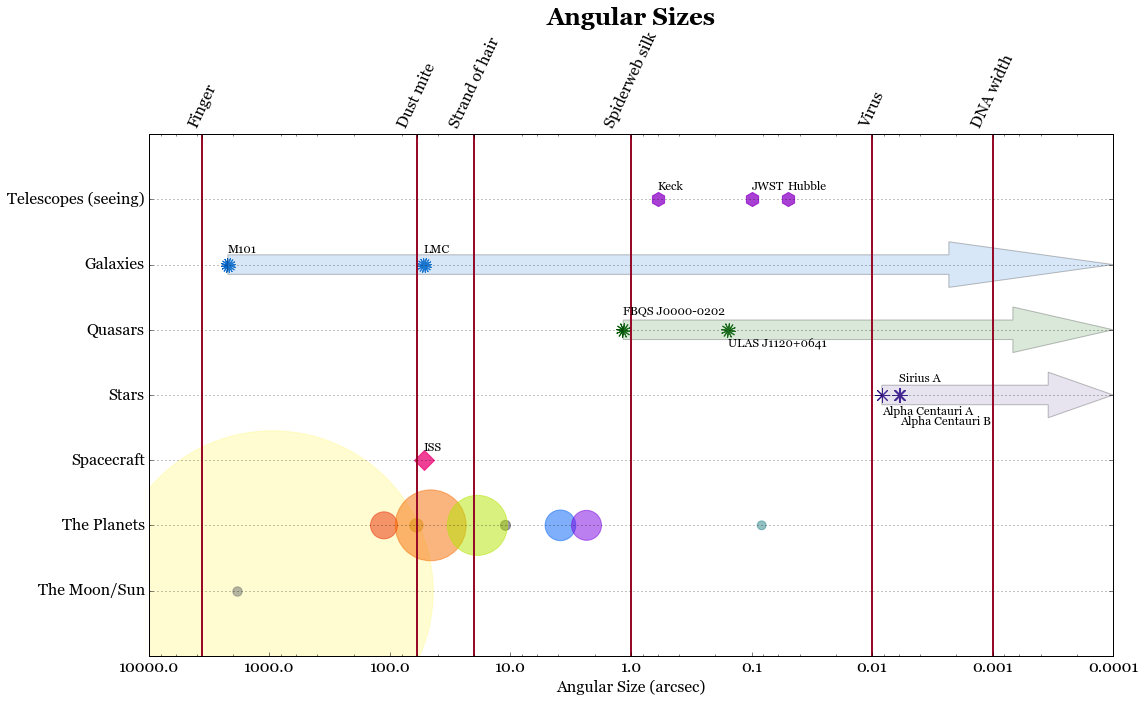

In [73]:
angularSizeChart()